# Choice of binning in histograms

**See a nice tutorial by astropy [here](https://docs.astropy.org/en/stable/visualization/histogram.html)**

In [1]:
from astropy.visualization import hist
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
rc('font', family='serif')

In [2]:
%matplotlib notebook

## Different methods of choosing a bin size:

### Scott's method for optimized bin width:
$$\Delta b = \frac{3.5\sigma}{n^{1/3}}$$

[Scott, David W. (1979). "On optimal and data-based histograms". Biometricka 66 (3): 605-610](https://academic.oup.com/biomet/article/66/3/605/232642)

### Freedman's method for optimized bin width:
$$\Delta b = \frac{2(q_{75}-q_{25})}{n^{1/3}}$$

[D. Freedman & P. Diaconis (1981) "On the histogram as a density estimator: L2 theory". Probability Theory and Related Fields 57 (4): 453-476](https://link.springer.com/article/10.1007%2FBF01025868)

### Knuth's likelihood for number of bins (M):
$$F(M|x,I) = n \log(M) + \log\Gamma(\frac{M}{2}) - M \log\Gamma(\frac{1}{2}) - \log\Gamma(\frac{2n+M}{2}) + \sum_{k=1}^{M}\log\Gamma(n_k + \frac{1}{2})$$

[Knuth, K.H. (2006) "Optimal Data-Based Binning for Histograms". arXiv:0605197](https://ui.adsabs.harvard.edu/abs/2006physics...5197K/abstract)

### Bayesian blocks:

[Scargle, J et al. (2013) "Studies in Astronomical Time Series Analysis. VI. Bayesian Block Representations". ApJ 764, 167](https://ui.adsabs.harvard.edu/abs/2013ApJ...764..167S/abstract)

<IPython.core.display.Javascript object>


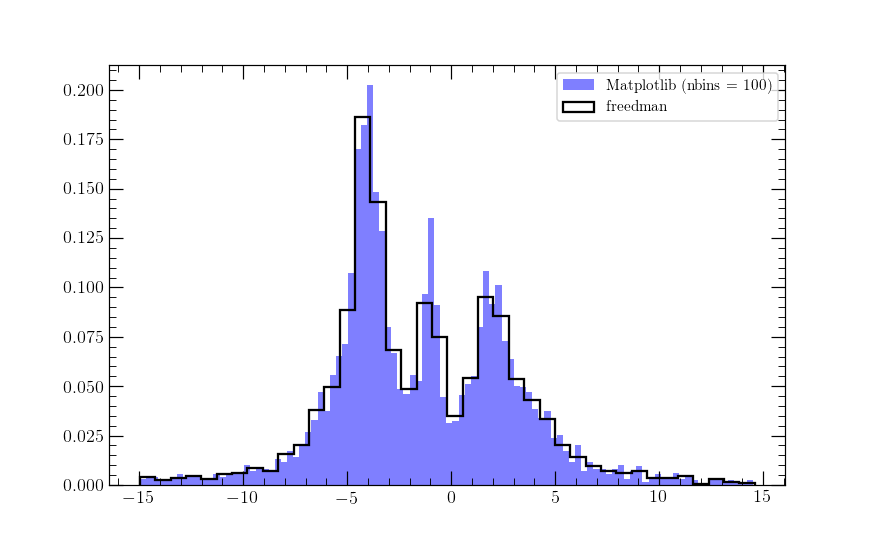

<IPython.core.display.Javascript object>


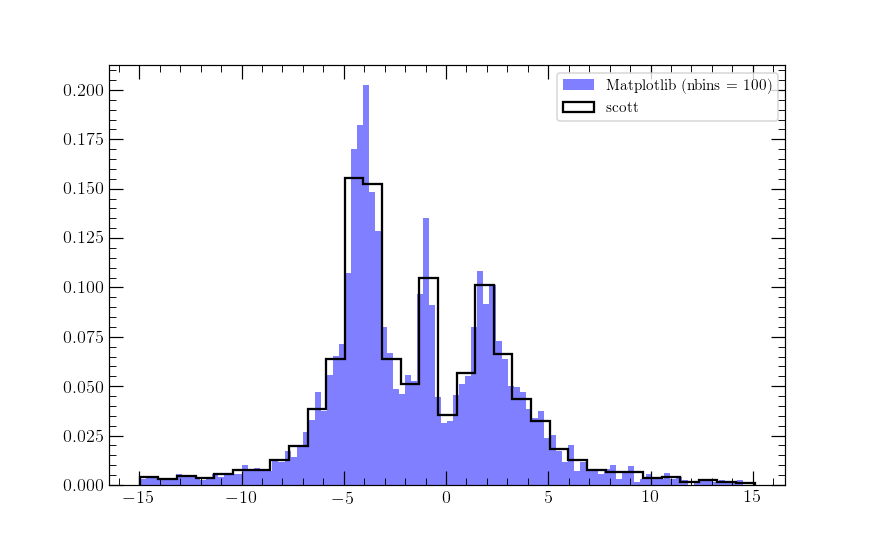

<IPython.core.display.Javascript object>


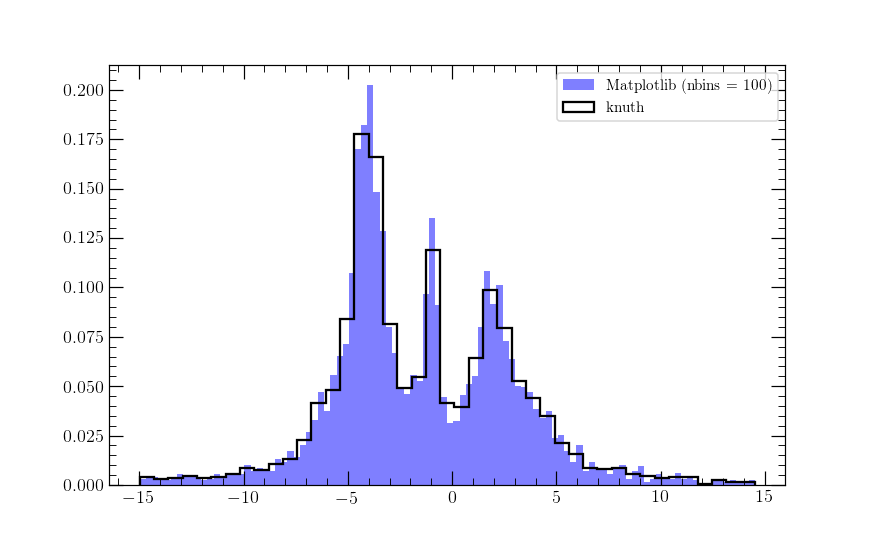

<IPython.core.display.Javascript object>


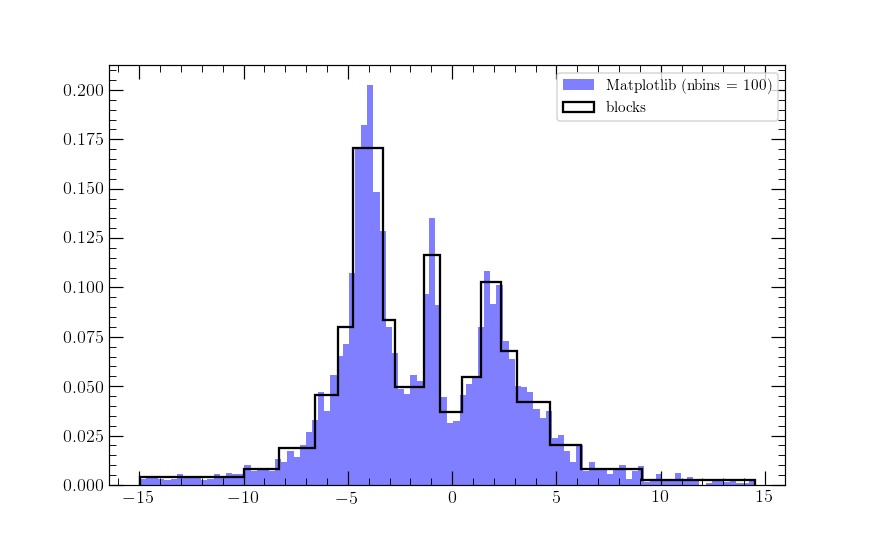

In [3]:
np.random.seed(0)
rand_dist = np.concatenate([sts.cauchy(-5, 1.8).rvs(500),
                            sts.cauchy(-4, 0.8).rvs(2000),
                            sts.cauchy(-1, 0.3).rvs(500),
                            sts.cauchy(2, 0.8).rvs(1000),
                            sts.cauchy(4, 1.5).rvs(500)])

# truncate values to a reasonable range
rand_dist = rand_dist[(rand_dist > -15) & (rand_dist < 15)]


for i in ['freedman','scott','knuth','blocks']:
    plt.figure(figsize=(8,5))
    plt.hist(rand_dist,bins=100,density=True, color='b',alpha=0.5, label='Matplotlib (nbins = 100)')
    hist(rand_dist, bins=i, histtype='step',density=True, color='k', linewidth=1.5, label=i)
    plt.legend()
    plt.minorticks_on()
    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.tick_params(axis='both', which='major', length=9)
    plt.tick_params(axis='both', which='minor', length=4.5)
    plt.tick_params(axis='both', which='both',direction='in',right=True,top=True)